In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


**Distribution Graphs**

In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nrows, ncols):
    """
    Plot the distribution of each column in the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing data.
    nrows (int): Number of rows in the subplot grid.
    ncols (int): Number of columns in the subplot grid.
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
    axes = axes.flatten()  # Flatten the grid into a single array for easy indexing
    
    for i, column in enumerate(df.columns):
        if i >= nrows * ncols:  # Avoid exceeding the grid size
            break
        ax = axes[i]
        if df[column].dtype in ['int64', 'float64']:  # Numeric columns
            df[column].hist(ax=ax, bins=30)
            ax.set_title(f'Distribution of {column}')
        else:  # Non-numeric columns
            df[column].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Counts of {column}')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

**Correlation Matrix**

*Encode 'Species' as numerical values*

In [6]:
from sklearn.preprocessing import LabelEncoder

data = {
    'SepalLength': [5.1, 4.9, 4.7, 4.6, 5.0],
    'SepalWidth': [3.5, 3.0, 3.2, 3.1, 3.6],
    'PetalLength': [1.4, 1.4, 1.3, 1.5, 1.4],
    'PetalWidth': [0.2, 0.2, 0.2, 0.2, 0.2],
    'Species': ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']
}
df = pd.DataFrame(data)

# Encode the 'Species' column
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

print(df)

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species  \
0          5.1         3.5          1.4         0.2  Iris-setosa   
1          4.9         3.0          1.4         0.2  Iris-setosa   
2          4.7         3.2          1.3         0.2  Iris-setosa   
3          4.6         3.1          1.5         0.2  Iris-setosa   
4          5.0         3.6          1.4         0.2  Iris-setosa   

   Species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [7]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth=10, cmap='coolwarm', annotate=True):
    """
    Plots a correlation matrix for the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame to analyze.
    graphWidth (int): The width and height of the correlation matrix plot.
    cmap (str): Colormap for the heatmap.
    annotate (bool): If True, displays correlation coefficients on the heatmap.
    """
    # Ensure 'dataframeName' is defined or set a default name
    filename = getattr(df, 'dataframeName', 'DataFrame')
    
    # Drop columns with NaN values
    df = df.dropna(axis=1)
    
    # Remove columns with only a single unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Check if there are enough columns to create a correlation matrix
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    # Compute the correlation matrix
    corr = df.corr()
    
    # Plot the correlation matrix using Seaborn
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80)
    sns.heatmap(corr, annot=annotate, fmt=".2f", cmap=cmap, square=True, cbar=True)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

**Scatter and Density plots**

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize=10, textSize=8):
    """
    Plots a scatter matrix with pairwise scatter plots, KDE plots on the diagonal,
    and correlation coefficients in the upper triangle.

    Parameters:
    df (DataFrame): The DataFrame to analyze.
    plotSize (int): The size of the scatter matrix plot.
    textSize (int): The size of the text for annotations.
    """
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with NaN values and columns with only one unique value
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Limit to a maximum of 10 columns for better visualization
    columnNames = list(df.columns)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    
    # Create the scatter matrix
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    
    # Compute correlations
    corrs = df.corr().values
    
    # Annotate correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', 
                          (0.8, 0.2), xycoords='axes fraction', 
                          ha='center', va='center', size=textSize)
    
    # Add a title
    plt.suptitle('Scatter and Density Plot', size=15)
    plt.show()
    

> Read the Data

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('../input/iris/Iris.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Iris.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 150 rows and 6 columns


In [10]:
df1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Visualization**

**Distribution Graph**

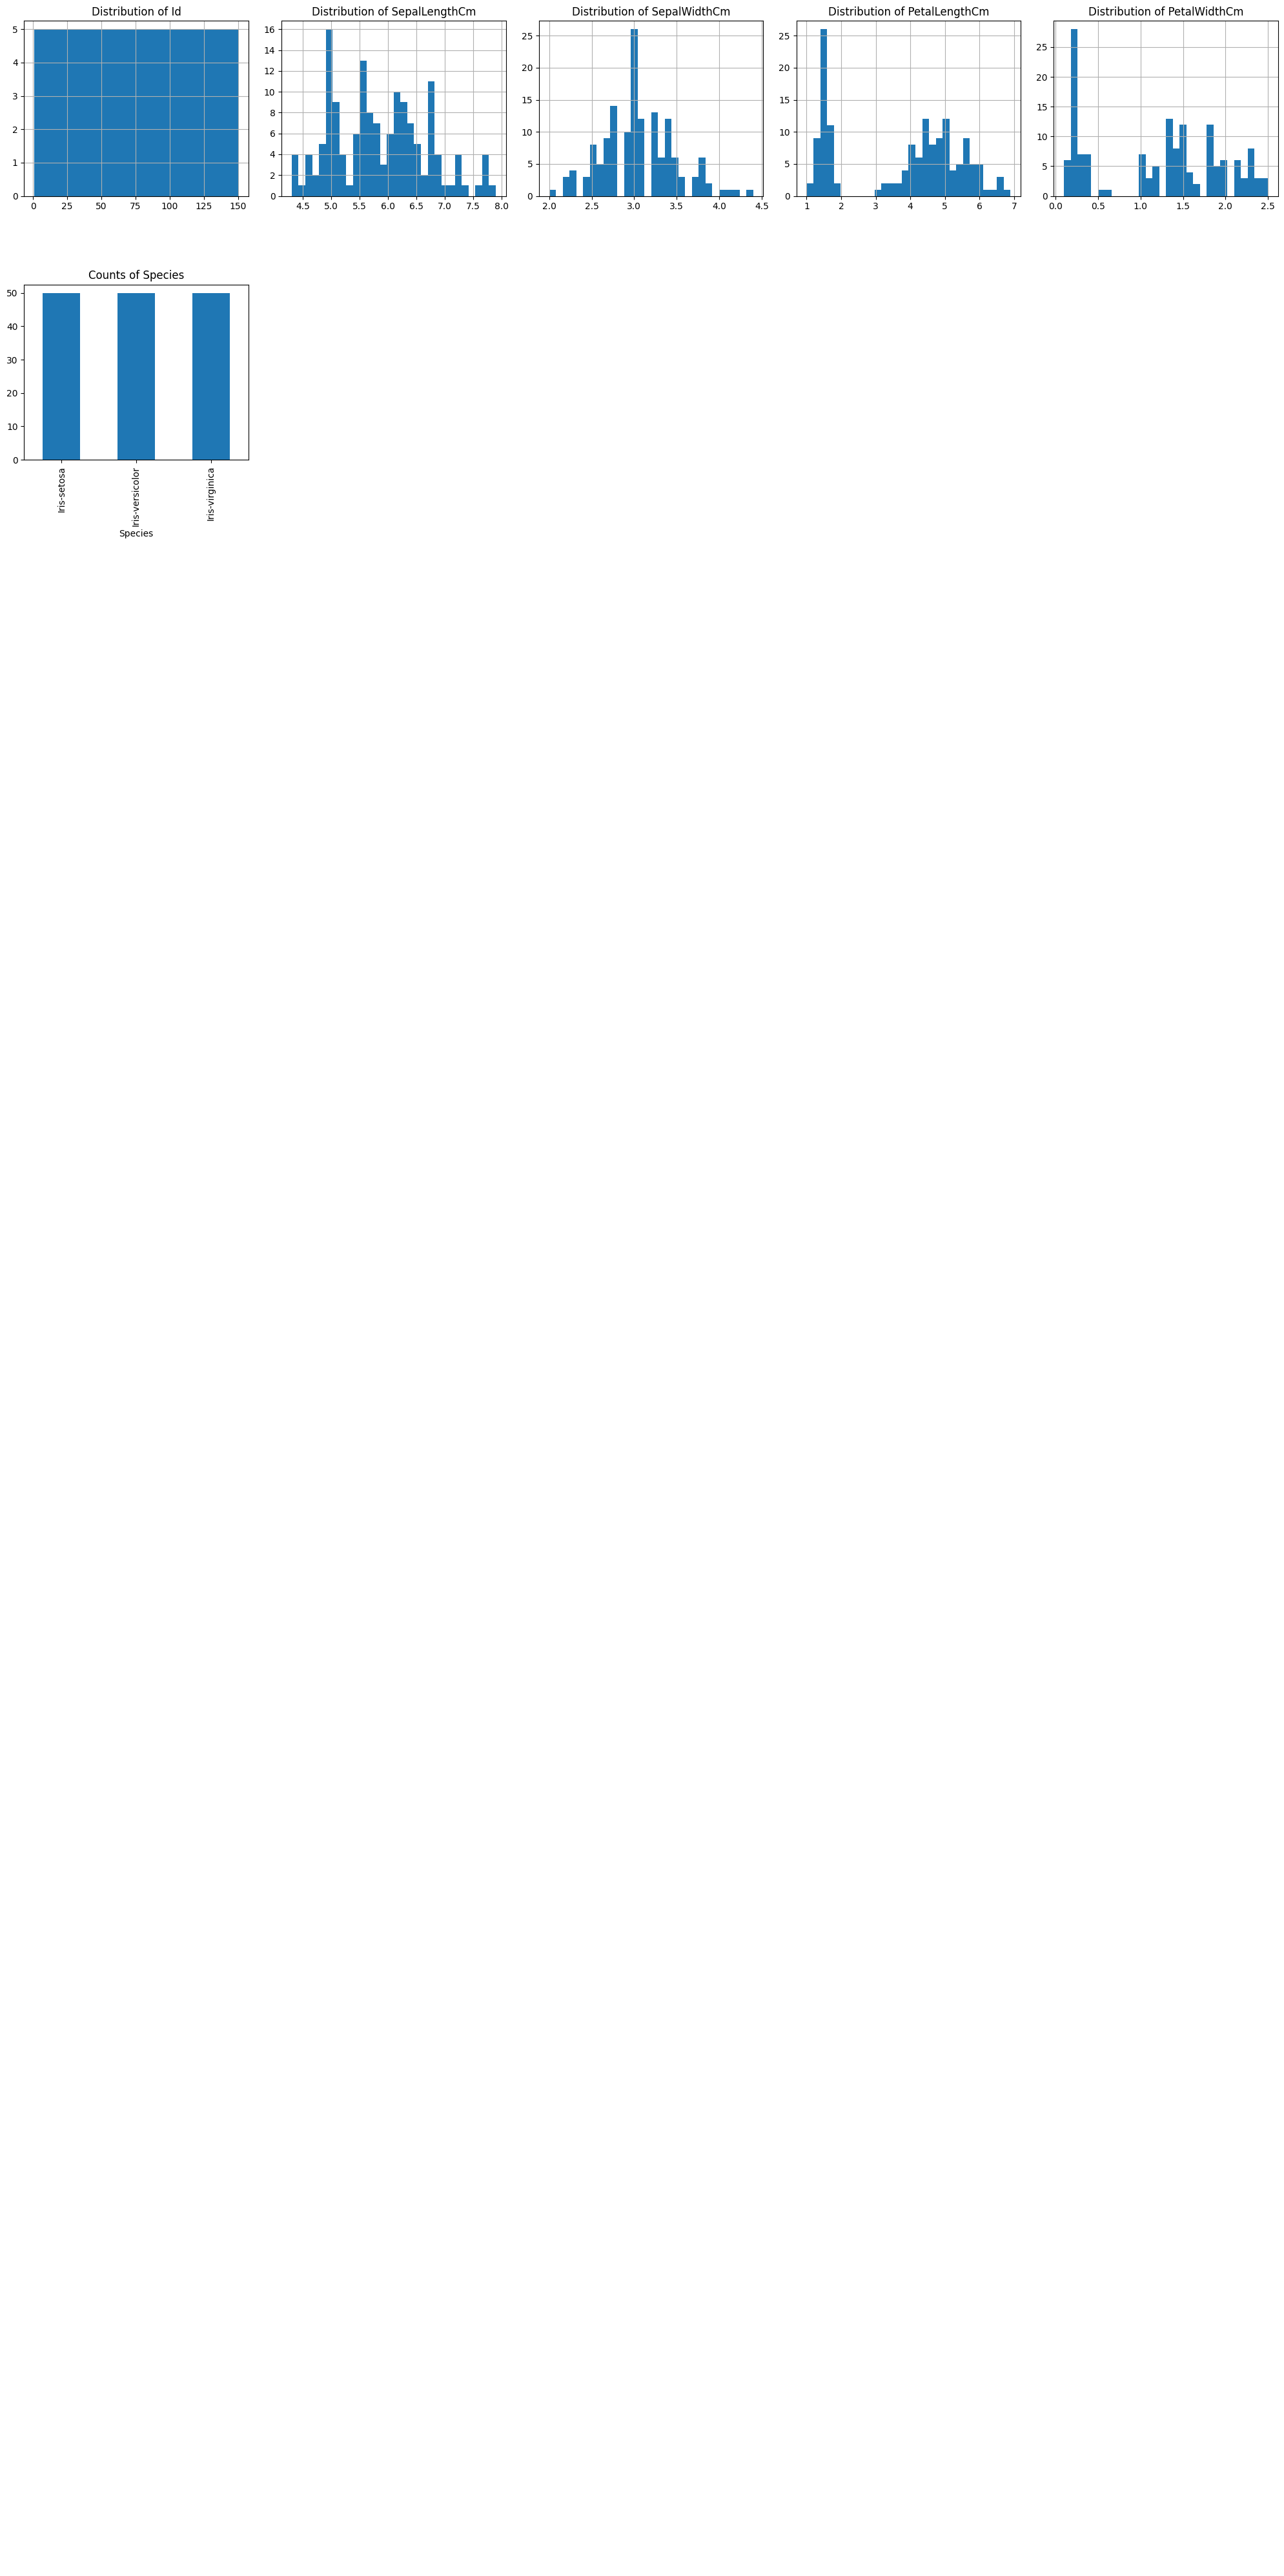

In [11]:
plotPerColumnDistribution(df1, 10, 5)

> Plot correlation Matrix

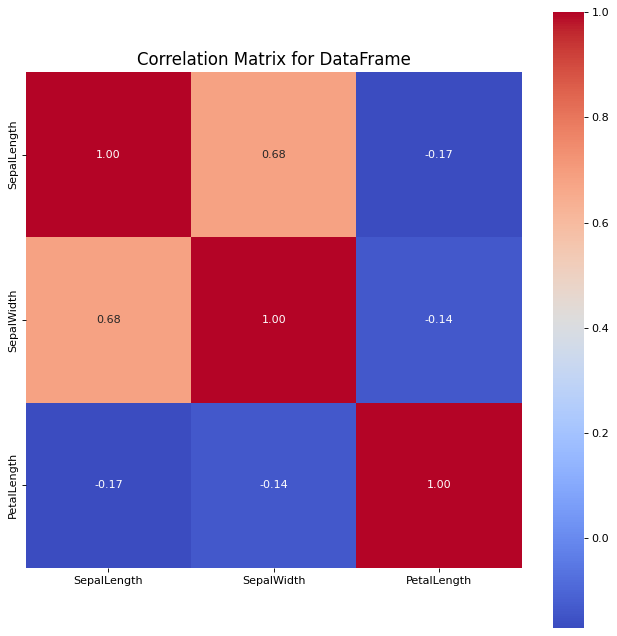

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Plot the correlation matrix
plotCorrelationMatrix(df, graphWidth=10)

> Plot the Scatter Matrix

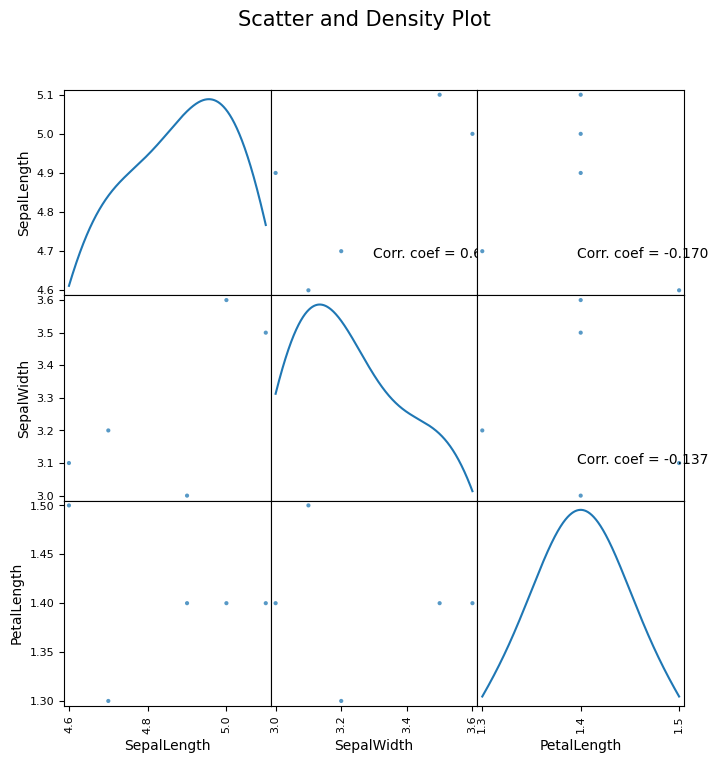

In [13]:
# Plot the scatter matrix
plotScatterMatrix(df, plotSize=8, textSize=10)